# 행정구역별 의료기관 현황 분석해보기. 
## 블록맵을 시각화 
### 필요한 데이터 준비물 
### 1) 공공보건의료 기관 현황.csv 
### 2) 행정구역별 시군구 인구수 엑셀 파일 

## 작업 
### 1. 행정구역별 주소 수정. 
### 2. 행정구역별 의료기관 수 집계
### 3. 행정구역별 인구수 정리 
### 4. 테이블 정리, 내부(공통된 행만 뽑아서), 외부(모든 행을 다 합치기)

### 블록맵: 구역의 경계선을 단순화 작업하고, -> 블록(사각형모양으로 ) 그려서 지도에 표기. 
### 히트맵으로 온도로 시각화 하는 것과 거의 비슷. 


## 데이터수집
### 준비물)
### 공공데이터 -> 공공보건 의료기관 현황 데이터 csv 다운로드 
### 1) 보건복지부 공공보건 의료기관 현황

### 2)행정구역 시군구 인구수 엑셀파일

In [106]:
import pandas as pd 
pd.set_option("mode.chained_assignment",None)
import numpy as np 

data = pd.read_csv("공공보건의료기관현황.csv", index_col=0, encoding="utf-8", engine="python")
data


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [107]:
# 공공 의료기관의 주소 데이터 정리 작업. 
# 기존 csv 파일에서 -> 주소 컬럼에 각각의 행의 내용을 공백을 기준으로 잘라서, 시도, 군구를 뽑는 작업
# 반환 타입 -> 새로운 DataFrame (표)
addr =pd.DataFrame(data["주소"].apply(lambda v : v.split()[:2]).tolist(), columns=["시도","군구"])
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [108]:
# 해당 주소에서 1차 지역명, 2차 지역명으로 추출후 , 중복 제거
print(len(addr["시도"].unique()))
addr["시도"].unique()

29


array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [109]:


# 창원시 -> 경상남도에 포함, 시도 컬럼에 있으면 안됨,
# 2차 지역명 군구에 있어야 함.
# 경산시 -> 경상북도에 포함
# 천안시 -> 충청남도
# 수정해보기.
# 시도 컬럼을 기준으로 내용이 창원시 를 찾는 부분
addr[addr["시도"] == "창원시"]

# 해당 잘못된 데이터의 행을 수정 재할당.
addr.iloc[27] = ["경상남도", "창원시"]
addr.iloc[27]
#
addr.iloc[31] = ["경상남도", "창원시"]
addr.iloc[31]

addr[addr["시도"] == "경산시"]
addr.iloc[47] = ["경상북도", "경산시"]
addr.iloc[47]
#
addr[addr["시도"] == "천안시"]
#
# # 209 , 210
addr.iloc[209] = ["충청남도", "천안시"]
addr.iloc[210] = ["충청남도", "천안시"]
# print(addr.iloc[209])
# print(addr.iloc[210])
#
addr["시도"].unique()


array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [110]:
# 1차 지역명 통일하기
# 강원도 -> 강원특별자치도
# 경기 -> 경기도 
# 경북 -> 경상북도 
# 충북 -> 충청북도 
# 충남 -> 충청남도
# 전북 -> 전북특별자치도
# 전남 -> 전남특별자치도
# 서울시 -> 서울특별시
# 대전시 -> 대전광역시 
# 부산특별시 -> 부산광역시

# 딕션너리, 키: value 형태로 
# "강원도" : "강원특별자치도", 인덱스 일치 하지 않음. 
addr_alias = {
  "경기" : "경기도",
  "경남" : "경상남도" ,
  "경북" : "경상북도", 
  "충북" : "충청북도" ,
  "충남" : "충청남도",
  "전북" : "전북특별자치도" ,
  "전라북도" : "전북특별자치도" ,
  "전남" : "전남특별자치도",
  "전라남도" : "전남특별자치도",
  "서울시" : "서울특별시",
  "대전시" : "대전광역시", 
  "부산특별시" : "부산광역시",
  "강원도" : "강원특별자치도" ,
}

# addr_alias.get(v,v) -> v 딕션너리의 키이고, 키에 대한 값이 있다면 변경하고, 
# 만약, 키에 대한 값이 없다면, 해당 키를 그대로 사용하겠다라는 의미. 
addr["시도"] = addr["시도"].apply(lambda v: addr_alias.get(v,v))
print(len(addr["시도"].unique()))
addr["시도"].unique()





16


array(['강원특별자치도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전남특별자치도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전북특별자치도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

In [111]:
# 2차 지역명 데이터 확인.
# 2차 지역명이 나중에, 블록맵에서, 분할 되는 공간과 매칭이 안됨.
# 최신 2차 지역명으로 작업시, 그림이 깨지는 문제가 있다.
# 그래서, 일단, 2차 지역명은 예전 데이터로 이용할 예정.
addr["군구"].unique()

# "아란13길" : 제주시로 변경하기.
addr[addr["군구"] == "아란13길"]
addr.iloc[75] = ["제주특별자치도","제주시"]
addr["군구"].unique()
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [112]:
print(len(addr["군구"].unique()))
addr["군구"].unique()

132


array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [113]:
# 행정구역별 의료기관 수 확인 하기. 
# 새 컬럼 추가. 시도군구
addr["시도군구"] = addr.apply(lambda r: r["시도"]+" "+r["군구"], axis=1)
print(len(addr["시도군구"]))
print(len(addr["시도군구"].unique()))
# addr.head()
addr


227
140


,시도,군구,시도군구
0,강원특별자치도,춘천시,강원특별자치도 춘천시
1,강원특별자치도,삼척시,강원특별자치도 삼척시
2,강원특별자치도,영월군,강원특별자치도 영월군
3,강원특별자치도,원주시,강원특별자치도 원주시
4,강원특별자치도,강릉시,강원특별자치도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


In [114]:
# addr  위에 주소에, count 컬럼 추가하기. 
addr["count"] = 0
addr.head()

,시도,군구,시도군구,count
0,강원특별자치도,춘천시,강원특별자치도 춘천시,0
1,강원특별자치도,삼척시,강원특별자치도 삼척시,0
2,강원특별자치도,영월군,강원특별자치도 영월군,0
3,강원특별자치도,원주시,강원특별자치도 원주시,0
4,강원특별자치도,강릉시,강원특별자치도 강릉시,0


In [115]:
# 시도 군구에 대해서 갯수 집계 해보기. 
# 위에 컬럼 생성시 시도군구 뒤에 공백 들어가서 인식을 못함. 오류 
# 이 결과가, 시군구 별 -> 의료기관의 수를 집계
addr_group = pd.DataFrame(addr.groupby(["시도", "군구","시도군구"], as_index=False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,양구군,강원특별자치도 양구군,1


In [116]:
# 인덱스, 시도군구로 설정하기. 
# 행정구역별 의료기관 테이블 ------ 행정구역별 인구수 테이블, 조인 ,
# 병합하기 위해서,
# 공통의 인덱스 요소를 맞추기( 깔 맞춤.)
addr_group = addr_group.set_index("시도군구")
addr_group.to_csv("./addr_group.csv", encoding="utf-8", index=False)
# addr_group.head()
addr_group

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [144]:
# 행정구역별 시군구 인구수 엑셀 파일 정리  -> 인구수 , 2025.1
# 해당 데이터 강원도 부분 인덱스 불일치, 임시로 강원도로 해둠.
population = pd.read_excel("./행정구역_시군구_별__성별_인구수2.xlsx")
# population.head()
population


,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51207874,25492996,25714878
1,서울특별시,소계,9330658,4504432,4826226
2,서울특별시,종로구,138208,66514,71694
3,서울특별시,중구,120325,57948,62377
4,서울특별시,용산구,203727,97392,106335
...,...,...,...,...,...
288,경상남도,거창군,59514,29241,30273
289,경상남도,합천군,40133,19738,20395
290,제주특별자치도,소계,669460,334794,334666
291,제주특별자치도,제주시,487623,243336,244287


In [145]:
# 1차 지역명, 2차 지역명, 모양 맞추기. 
# 	행정구역(시군구)별(1) : 시도
# 	행정구역(시군구)별(2) : 군구
population = population.rename(columns={"행정구역(시군구)별(1)" : "시도","행정구역(시군구)별(2)" : "군구"}) 
population.head()


,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51207874,25492996,25714878
1,서울특별시,소계,9330658,4504432,4826226
2,서울특별시,종로구,138208,66514,71694
3,서울특별시,중구,120325,57948,62377
4,서울특별시,용산구,203727,97392,106335


In [146]:
# 군구 부분에 왼쪽 공백 제거, 새 컬럼 추가 -> 시도군구 
# 시도군구 새 컬럼을 -> 인덱스로 설정. 
for element in range (0, len(population)):
  population["군구"][element] = population["군구"][element].strip()

# 시도군구 새컬럼 추가 
population["시도군구"] = population.apply(lambda r: r["시도"] + " " + r["군구"], axis=1)

population.head()


C:\Users\it\AppData\Local\Temp\ipykernel_16572\804142030.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  population["군구"][element] = population["군구"][element].strip()
C:\Users\it\AppData\Local\Temp\ipykernel_16572\804142030.py:4: FutureW

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,합계,51207874,25492996,25714878,전국 합계
1,서울특별시,소계,9330658,4504432,4826226,서울특별시 소계
2,서울특별시,종로구,138208,66514,71694,서울특별시 종로구
3,서울특별시,중구,120325,57948,62377,서울특별시 중구
4,서울특별시,용산구,203727,97392,106335,서울특별시 용산구


In [147]:

# 소계 부분 제거하기. 
population = population[population.군구 != "소계"]

population = population[population.군구 != "합계"]


population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,138208,66514,71694,서울특별시 종로구
3,서울특별시,중구,120325,57948,62377,서울특별시 중구
4,서울특별시,용산구,203727,97392,106335,서울특별시 용산구
5,서울특별시,성동구,273549,132354,141195,서울특별시 성동구
6,서울특별시,광진구,331589,158992,172597,서울특별시 광진구


In [148]:
# 인덱스 설정. 
population = population.set_index("시도군구")
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,138208,66514,71694
서울특별시 중구,서울특별시,중구,120325,57948,62377
서울특별시 용산구,서울특별시,용산구,203727,97392,106335
서울특별시 성동구,서울특별시,성동구,273549,132354,141195
서울특별시 광진구,서울특별시,광진구,331589,158992,172597


In [149]:
# 데이터 병합 (내부 조인, 인덱스를 기준으로, 같은 행 기준으로 합치기함.  )
# 내부 조인 -> 인덱스를 기준으로, 시도군구의 행이 같은 것들만 모아서 합침. 
# 외부 조인 -> 같은행 상관없이 모두 합치기. 
addr_population_merge = pd.merge(addr_group, population, how="inner", left_index=True, right_index=True)
print(addr_population_merge.shape)
addr_population_merge.to_csv('./addr_population_merge.csv',encoding='utf-8')
addr_population_merge.head()


(138, 8)


,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,207543,102789,104754
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,87571,44439,43132
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,61464,31279,30185
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,80754,39851,40903
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,20552,10749,9803


In [150]:
# 필요한 컬럼만 추출 , 총 4개의 컬럼이 필요함
# 행정구역별 의료기관의 인구수 대비의 비율를 구하는게 목적. 
# count -> 의료기관수
# 시도_x	군구_x	count		총인구수 (명), 
local_Hospital_Population = addr_population_merge[["시도_x", "군구_x", "count", "총인구수 (명)"]]
local_Hospital_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207543
강원특별자치도 동해시,강원특별자치도,동해시,1,87571
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61464
강원특별자치도 속초시,강원특별자치도,속초시,1,80754
강원특별자치도 양구군,강원특별자치도,양구군,1,20552


In [151]:
# 컬럼 이름 조정, 인구수 대비 의료기관 비율 새컬럼 추가. 
local_Hospital_Population = local_Hospital_Population.rename(columns= {"시도_x": "시도","군구_x" :"군구", "총인구수 (명)" : "인구수"})
# local_Hospital_Population.head()
local_Hospital_Population



,시도,군구,count,인구수
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207543
강원특별자치도 동해시,강원특별자치도,동해시,1,87571
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61464
강원특별자치도 속초시,강원특별자치도,속초시,1,80754
강원특별자치도 양구군,강원특별자치도,양구군,1,20552
...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27293
충청북도 영동군,충청북도,영동군,1,43504
충청북도 제천시,충청북도,제천시,1,128352


In [152]:
#새 컬럼HS_ratio : (병원의 숫자 / 인구수 ) * 100000 = 비율 
HS_count = local_Hospital_Population["count"]
local_Hospital_Population["HS_ratio"] = HS_count.div(local_Hospital_Population["인구수"], axis=0)*100000
# local_Hospital_Population.head()
local_Hospital_Population

,시도,군구,count,인구수,HS_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207543,1.927311
강원특별자치도 동해시,강원특별자치도,동해시,1,87571,1.141931
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61464,1.626969
강원특별자치도 속초시,강원특별자치도,속초시,1,80754,1.238329
강원특별자치도 양구군,강원특별자치도,양구군,1,20552,4.865707
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27293,3.663943
충청북도 영동군,충청북도,영동군,1,43504,2.298639
충청북도 제천시,충청북도,제천시,1,128352,0.779107


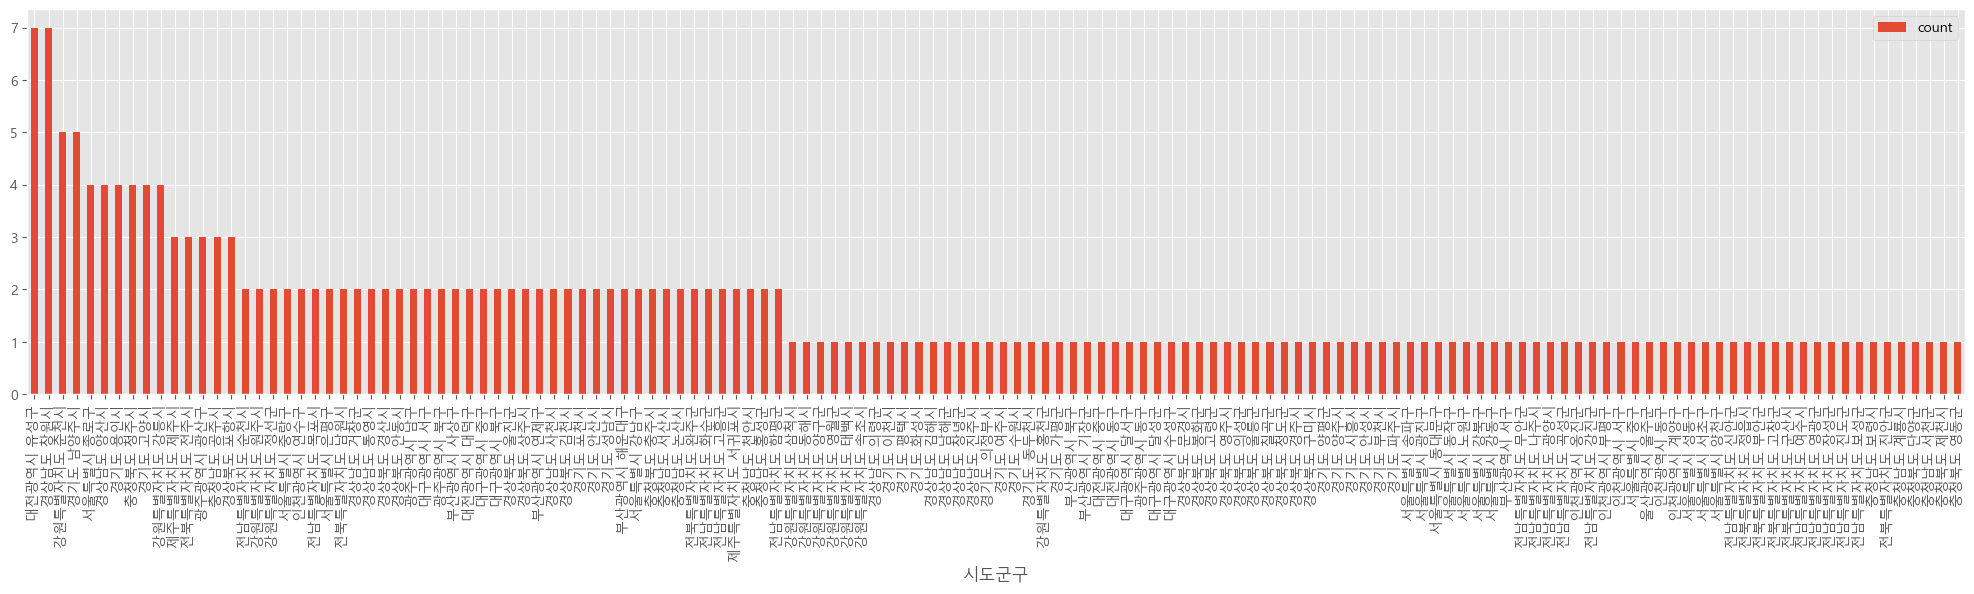

In [153]:
# 막대 그래프만 그리기. 
# 블록맵은 추가 설정이 필요해서, 다음시간에 
from matplotlib import pyplot as plt 
from matplotlib import rcParams, style
# R 프로그래밍 -> 시각화 할 때, 해당 그림의 속성을 좀더 편하게 지정하는 템플릿 
# gg -> gramar graph , 도표를 작성시 필요한 구문(문법)-> 도표, 크기, 색갈, 폰트, 등. 
style.use("ggplot")

# 폰트를 지정. font_manager
# rc -> runtime configuration , 표의 속성을 전역으로 설정하는 , 모듈 (도구)
# 한번, 표에 관련된 설정을 해두면, 밑에서 다른 도표에서 사용시, 전역으로 설정이 되었으니, 따로 할 필요가 없다.
from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgunbd.ttf").get_name()
rc("font", family = font_name)

# local_Hospital_Population["count"] -> 반환값 시리즈 , 시리즈(행, 열 1개로 표현을 하는 타입)
# local_Hospital_Population[["count"]] -> 반환값 데이터 프레임(표)
HS_ratio = local_Hospital_Population[["count"]]
# HS_ratio -> 타입 : DataFrame 표. 
# count 컬럼의 값들을 , 오름 차순 False -> 내림 차순, 
HS_ratio = HS_ratio.sort_values("count", ascending=False)
# 30 , 단위 인치, 
plt.rcParams["figure.figsize"] = (25,5)
# rot = 80, x 라벨의 표기의 기울기
HS_ratio.plot(kind = "bar", rot = 90)
plt.show()



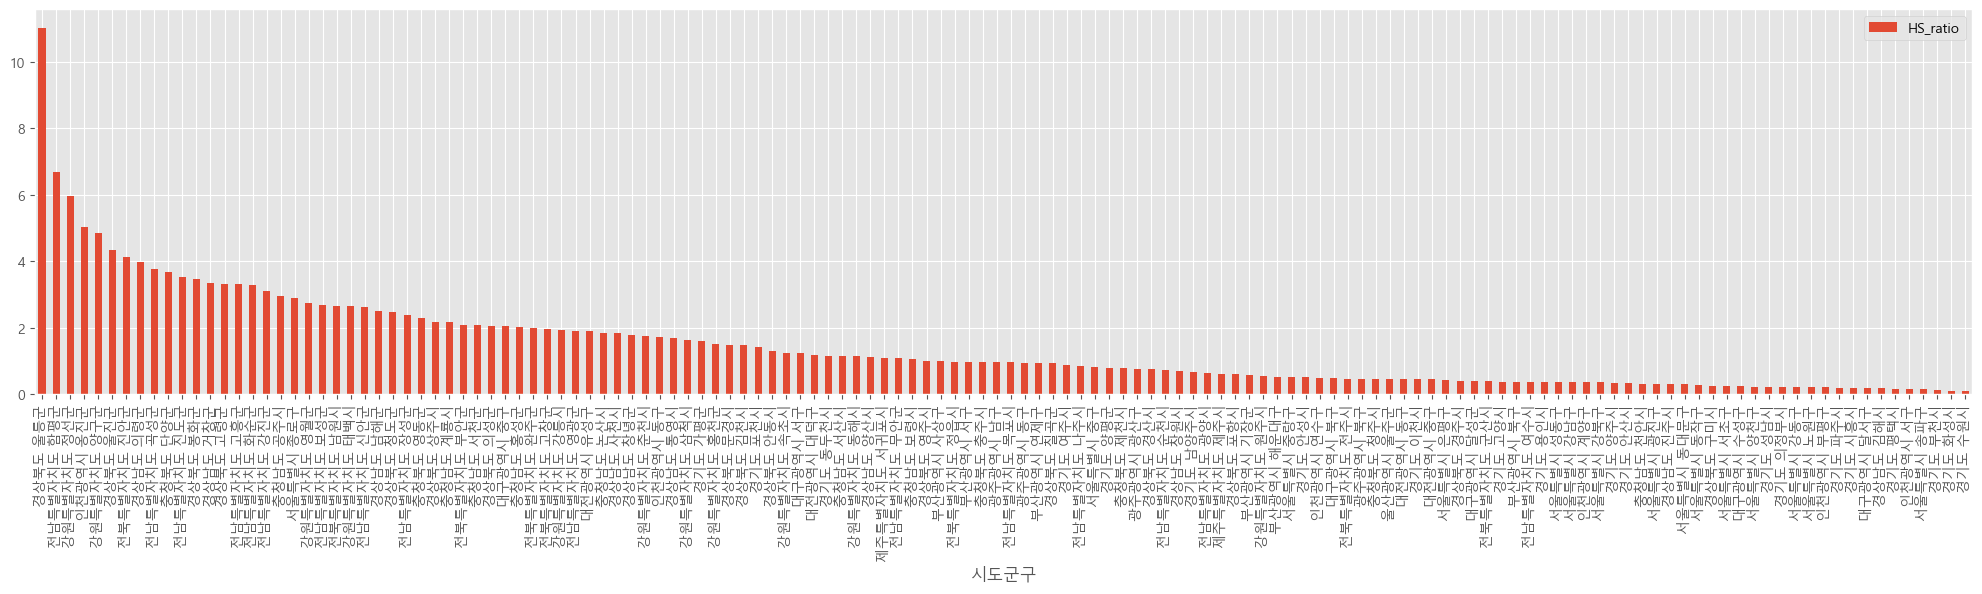

In [154]:
HS_ratio = local_Hospital_Population[["HS_ratio"]]
# HS_ratio -> 타입 : DataFrame 표. 
# count 컬럼의 값들을 , 오름 차순 False -> 내림 차순, 
HS_ratio = HS_ratio.sort_values("HS_ratio", ascending=False)
# 30 , 단위 인치, 
plt.rcParams["figure.figsize"] = (25,5)
# rot = 80, x 라벨의 표기의 기울기
HS_ratio.plot(kind = "bar", rot = 90)
plt.show()

In [155]:
# 블록맵 준비 
# 블록맵을 구성하는 , 각 지역마다, 특정의 임의의 좌표로한 데이터 가 필요.
# 블록맵을 경계를 나눌 샘플 좌표 데이터가 필요. 
# 데이터 출처를 조사, 

# 준비물 1 : data_draw_korea.csv
# 준비물 2
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [156]:
import os 
# 현재 작업 중 폴더 경로 불러오기. 
path = os.getcwd()
path


'D:\\0-bigdataVisualiza\\ch3-지도맵-통계'

In [157]:
# 준비물 1번 메모리에 올리기. 
# index_col=0 -> 첫번째 열을 , 데이터프레임의 인덱스로 사용함.
data_draw_korea = pd.read_csv(path+"\\data_draw_korea.csv", index_col=0, encoding="utf-8", engine="python")
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [158]:
#행정 구역 지역명 추출 작업. 
# 광역시도 열, 행정구역 열 추출해서, 새로운 시도군구 열을 추가하기.
addr_aliases = {'강원도' :'강원특별자치도', '전라북도':'전북특별자치도',
                '전라남도':'전남특별자치도'}
data_draw_korea["광역시도"]= data_draw_korea['광역시도'].apply(lambda r: addr_aliases.get(r,r))
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
2,86747,동해,11,5,180.01,강원특별자치도,동해시
3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
4,76733,속초,9,1,105.25,강원특별자치도,속초시


In [159]:
# 데이터 프레임 병합 할려면, 인덱스 동일하게 맞추는 작업(깔 맞춤)
# 시도군구 열 -> 인덱스로 설정.
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] +' '+r['행정구역'], axis=1)
data_draw_korea = data_draw_korea.set_index("시도군구")
# data_draw_korea.head()
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [160]:
#data_draw_korea 의 테이블, 기존에 사용하던, local_Hospital_Population , 
# 조인 , 외부조인,-> 해당 조건에서 값이 일치 하지 않는 행까지(모두 다 합침. )
# 만약, 해당 값이 없다면 -> NaN 집계가 됨. 

data_draw_korea_local_Hospital_Population = pd.merge(data_draw_korea,local_Hospital_Population, how="outer", left_index=True, right_index=True)

data_draw_korea_local_Hospital_Population
# data_draw_korea_local_Hospital_Population.head()
# data_draw_korea_local_Hospital_Population[["광역시도","행정구역"]]


,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,HS_ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,4.0,207543.0,1.927311
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,NaN,NaN,NaN,NaN,NaN
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도,동해시,1.0,87571.0,1.141931
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,1.0,61464.0,1.626969
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,80754.0,1.238329
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,128352.0,0.779107
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [161]:
min(data_draw_korea_local_Hospital_Population["count"])

1.0

In [162]:
max(data_draw_korea_local_Hospital_Population["count"])

7.0

In [163]:
data_draw_korea_local_Hospital_Population["count"].unique()

array([ 4., nan,  1.,  2.,  5.,  7.,  3.])

In [164]:
data_draw_korea_local_Hospital_Population["HS_ratio"].unique()

array([ 1.92731145,         nan,  1.14193055,  1.62696863,  1.23832875,
        4.8657065 ,  2.7320165 ,  0.55224363,  5.97246693,  1.74908348,
        2.64026403,  1.50012751,  1.60071712,  0.37413563,  0.68288193,
        1.15198083,  0.13002481,  0.21912813,  0.0838746 ,  0.19323261,
        0.32290303,  0.51544532,  0.34539093,  0.78869329,  0.87288979,
        0.36793654,  0.21685294,  0.44959986,  0.19469381,  0.16690646,
        1.41398716,  0.10289813,  3.36055382,  0.188082  ,  2.51698968,
        1.8446781 ,  1.11135808,  3.98501634,  0.29546549,  1.78443969,
        0.70042095,  1.69133192,  0.75184296,  0.40884913,  3.328784  ,
        0.24728298,  1.47481749,  1.4919806 ,  3.48201539,  2.17902902,
        1.30802736,  1.01233018, 11.03387399,  4.33783022,  2.05676676,
        2.4664562 ,  0.9333408 ,  0.61045216,  0.76693782,  0.96151997,
        0.9441979 ,  0.47236321,  0.19169096,  0.38839627,  0.48502839,
        1.22838805,  0.24409533,  2.03848663,  1.19200167,  0.45

In [165]:
# 준비물 2번 -> 지도에 , 각 2차지역을 사각형(블록)을 나누는 경계선 좌표.
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],  # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)],  # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)],  # 경기도
    [(9, 12), (9, 10), (8, 10)],  # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)],  # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)],  # 충청북도
    [(14, 4), (15, 4), (15, 6)],  # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)],  # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)],  # 대구시
    [(15, 11), (16, 11), (16, 13)],  # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)],  # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)],  # 광주시
    [(18, 5), (20, 5), (20, 6)],  # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)],  # 부산시
]


In [166]:
# 힘든 작업, 블록 맵을 그리기 위한 함수를 설정.
# 이미 만들어진 함수를 재사용. 
# blockedMap : 원본 데이터 프레임, 
# ex) data_draw_korea_local_Hospital_Population : 외부 조인한 원본 데이터 
# targetData : 내가 찾고자하는 결과데이터(종속변수)
# 예) 의료기관의 수 : count , 인구수 대비 의료기관의 비율 :  HS_ratio
# title, color : 도표의 제목과, 색깔. 

def draw_blockMap(blockedMap, targetData, title, color):
  # 블록맥의 각 구역의 색깔을 지정시, 최소 비율 -> 흰색 가까운 임의의 비율 색. 
  # 히트맵에서, 연관관계 가 높으면 색깔이 진한색(빨간,파란)
  whitelabelmin = (max(blockedMap[targetData])- min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
  # test 샘플값 
  print(f"whitelabelmin 전 : {whitelabelmin}")
  # whitelabelmin = 2.5
  print(f"whitelabelmin 후 : {whitelabelmin}")

  # 라벨 이름 
  datalabel = targetData  

  # vmin , vmax , -> 색깔을 표현하기 위한 최소, 최대 값으로 활용할 예정. 
  vmin = min(blockedMap[targetData])
  print(f"vmin 전 : {vmin}")
  # vmin = 1.0
  print(f"vmin 후 : {vmin}")
  vmax = max(blockedMap[targetData])
  print(f"vmax 전 : {vmax}")
  # vmax = 7.0
  print(f"vmax 후 : {vmax}")

  # pivot 함수를 이용해서, 기존의 행과 열을 , 새로운 데이터프레임(테이블)로 재배치하는 함수. 
  # index = "y" : 행, columns = "x" : 열 , 그 안에 값으로 : targetData
  mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
  print(f"mapdata : {mapdata}")

  # 전처리, NaN 없애기. 
  # np.ma.masked_where(각데이터의 NaN의 존재여부 True False 판단, mapdata)
  # np.isnan(mapdata) -> pivot 라는 함수로 새롭게 만들어진 테이블에서, nan 다 조사해서, 
  # 그 결과를 True, False 로 다반환, 
  # masked_mapdata -> nan 다 제거된 테이블 .
  masked_mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)
  print(f"masked_mapdata : {masked_mapdata}")

  # 그래프 옵션 
  # 8 인치, 13인치. 
  plt.figure(figsize=(8,13))
  # 제목은 함수의 인자값으로 들어고 됨. 
  plt.title(title)
  
  # 그래프 색깔. cmap = color -> 인자값으로 받을 예정, 빨간, 파란 
  # 블록맵의 각 사각형의 색깔을 지정하는 로직. 
  plt.pcolor(masked_mapdata, vmin = vmin , vmax = vmax , cmap = color, edgecolor = "#aaaaaa", linewidth = 0.5)

  #지역 이름표시. 
  # 원본 데이터를 반복문을 전체 조회를 해서, 각 지역명을 표기하는 방식
  # idx : 각 행의 인덱스, row : 각 행 
  for idx, row in blockedMap.iterrows():
    # 지도에 표시되는 지역명, 주석처리 사용이됨, 옵션 설정. 
    annocolr = "white" if row[targetData] > whitelabelmin else "black"

    # 광역시 = 시도, 행정구역 = 군구, 
    # 부산 강서구, 서울 강서구, 
    # 부산 동구, 서울, 인천 , 동구, 서구 , 중구 , 겹침. 
    # 2차지역명으로 만 표기시 중복이 되므로, 1차 지역명과 같이 표기 하는 방법. 

   
    # 부산
    # 서구
    # row["광역시도"][:2], 2 끝 미포함 , 0,1 ex) 부산광역시 -> 부산
    # row["행정구역"][:-1], -1 맨마지막 의미 미포함, 맨마지막 한글자 제외하고 전부
    #  ex) 강릉시 ->  강릉 
    # row["행정구역"][-1], 마지막 글자를 의미함. 
    #  ex) 강릉시 ->  시
    # ex) 부산광역시 , 
    if row["광역시도"].endswith("시") and not row["광역시도"].startswith("세종"):
      dispname = "{}\n{}".format(row["광역시도"][:2],row["행정구역"][:-1])
      if len(row["행정구역"]) <= 2:
        dispname += row["행정구역"][-1]
    else:
      dispname = row["행정구역"][:-1]

    # 글자 크기 조정하기. 2글자 조금 크게, 3글자 조금 작게 조정하기. 
    if len(dispname.splitlines()[-1]) >= 3:
      fontsize, linespacing = 9.5, 1.5
    else:
      fontsize, linespacing = 11, 1.2

    # 주석의 위치 조정 하기. 폰트 크기, 색 설정., 굵기 등.  
    plt.annotate(dispname, (row["x"]+0.5, row["y"]+0.5), weight = "bold",fontsize=fontsize, ha="center", va="center", color = annocolr, linespacing=linespacing)

  # 라인의 경계 그리기, 
  for path in BORDER_LINES:
    # zip, 같은 인덱스 끼리 묶기, 
    # *path, 언패킹, 각각의 변수에 할당. 
    ys, xs = zip(*path)
    plt.plot(xs,ys, c = "black", lw=4)
  # gca, get current axe , 현재 축을 선택.
  # y 축 반전하는 함수, invert_yaxis() -> 예) 원래 y로 위로 갈수록 커지는 속성 기본.
  # 반전, y가 커질수로, 아래로 향하게 하는 속성. 
  plt.gca().invert_yaxis()
  # x축, y축 표기 여부
  plt.axis("off")
  # 그래프 오른쪽의 각 색깔별 막대 그래프, shrink 크기, aspect 종횡비율, 각구간 범위.
  cb = plt.colorbar(shrink =1 , aspect = 10)
  #
  cb.set_label(datalabel)

  # 내부 요소가 겹치지 않게 그리기. 
  plt.tight_layout()
  # 결과 화면, 이미지 파일로 저장하기. 
  plt.savefig("./blockMap_"+ targetData + ".png")
  plt.show 




whitelabelmin 전 : 2.5
whitelabelmin 후 : 2.5
vmin 전 : 1.0
vmin 후 : 1.0
vmax 전 : 7.0
vmax 후 : 7.0
mapdata : x    0    1    2    3    4    5    6    7    8    9    10   11   12   13
y                                                                       
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
1   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  2.0  1.0  NaN  NaN  NaN  NaN
2   NaN  NaN  NaN  1.0  4.0  1.0  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN
3   NaN  NaN  NaN  NaN  2.0  NaN  4.0  1.0  5.0  1.0  5.0  NaN  NaN  NaN
4   NaN  1.0  1.0  NaN  NaN  NaN  1.0  1.0  2.0  NaN  1.0  4.0  NaN  NaN
5   NaN  1.0  1.0  1.0  1.0  1.0  NaN  1.0  1.0  NaN  NaN  1.0  NaN  NaN
6   NaN  NaN  1.0  2.0  NaN  NaN  1.0  1.0  1.0  1.0  NaN  2.0  NaN  1.0
7   NaN  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  1.0  2.0  1.0  NaN  NaN
8   1.0  2.0  NaN  NaN  1.0  NaN  NaN  2.0  1.0  1.0  1.0  1.0  NaN  NaN
9   NaN  NaN  NaN  NaN  2.0  1.0  1.0  4.0  2.0  NaN  1.0  1.0  2.0  NaN
10  NaN  2.0  2.0 

C:\Users\it\AppData\Local\Temp\ipykernel_16572\198700201.py:104: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink =1 , aspect = 10)


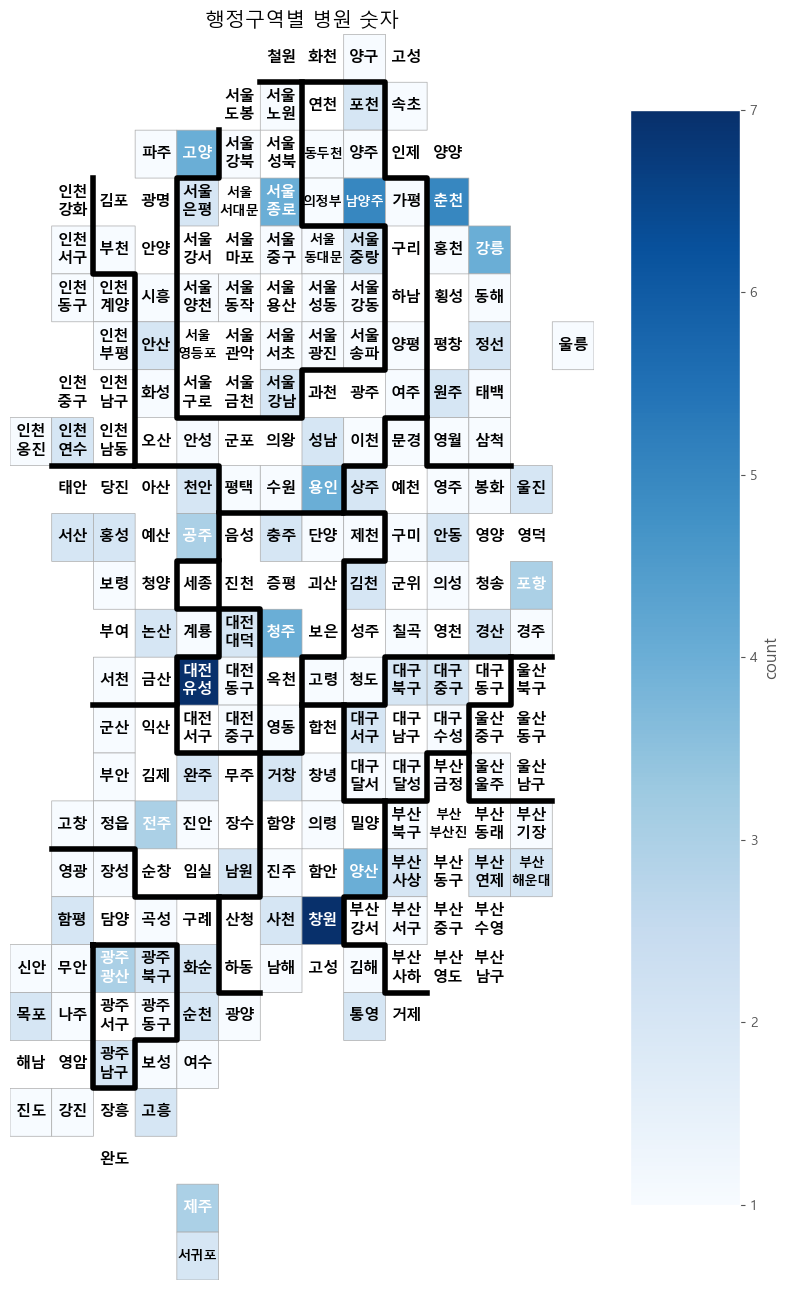

In [167]:
# 함수 이용해서 블록맵 그려보기. 
draw_blockMap(data_draw_korea_local_Hospital_Population,"count","행정구역별 병원 숫자", "Blues")

whitelabelmin 전 : 2.8213744513736514
whitelabelmin 후 : 2.8213744513736514
vmin 전 : 0.08387460411186859
vmin 후 : 0.08387460411186859
vmax 전 : 11.033873993158998
vmax 후 : 11.033873993158998
mapdata : x         0         1         2         3         4         5         6   \
y                                                                          
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN  0.203954   
2        NaN       NaN       NaN  0.194694  0.374136  0.352991       NaN   
3        NaN       NaN       NaN       NaN  0.434086       NaN  2.894188   
4        NaN  0.157343  0.130025       NaN       NaN       NaN  0.831082   
5        NaN  1.719336  0.357545  0.193233  0.232224  0.266343       NaN   
6        NaN       NaN  0.202489  0.322903       NaN       NaN  0.244904   
7        NaN       NaN       NaN  0.102898       NaN       NaN  0.358992   
8   5.024621  0.499424       NaN       NaN

C:\Users\it\AppData\Local\Temp\ipykernel_16572\198700201.py:104: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink =1 , aspect = 10)


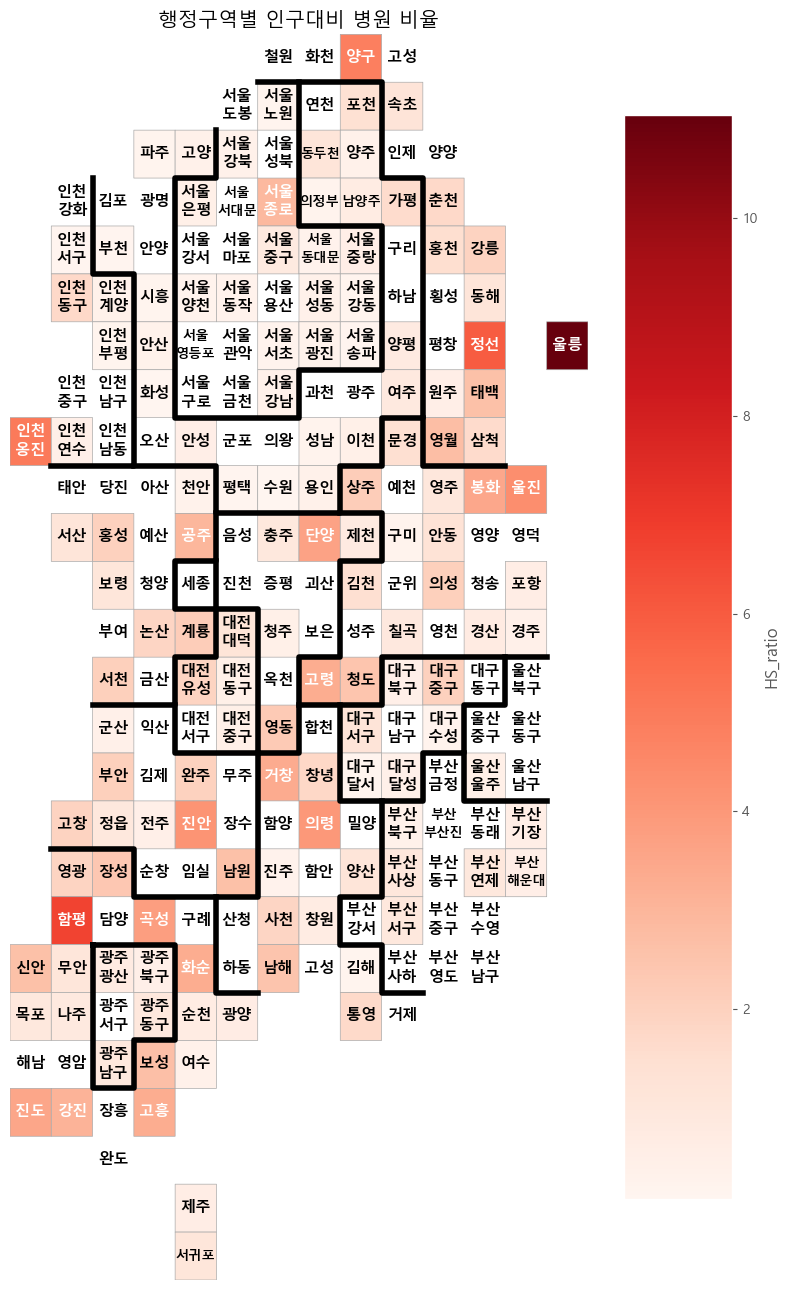

In [168]:
# 함수 이용해서 블록맵 그려보기. 
draw_blockMap(data_draw_korea_local_Hospital_Population,"HS_ratio","행정구역별 인구대비 병원 비율", "Reds")